### Problem statement
A company reached out that they want to create a customer segment, so that they can tailor their services 
to their customer needs. more like a recommendation system, where every customer gets tailored services


In [2]:
#importing necessary libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Import Data set. Data collection stage

In [3]:
#import data
df = pd.read_csv('Customer_data.csv')

In [4]:
df.head()

,Customer Age,TransactionAmount
0,17.9,4963.129824
1,5.8,8253.318230
2,14.2,14125.271049
3,12.8,14867.810811
4,20.8,6927.500432


## EDA
### Exploratory Data Analysis

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer Age       10000 non-null  float64
 1   TransactionAmount  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [7]:
df.columns

Index(['Customer Age', 'TransactionAmount'], dtype='object')

In [11]:
#check data size
df.shape

(10000, 2)

In [12]:
#check data
df.describe()

,Customer Age,TransactionAmount
count,10000.000000,10000.000000
mean,14.846520,9799.054144
std,4.303432,3606.092572
min,4.100000,2034.809099
25%,13.200000,6399.985037
50%,15.700000,9679.240424
75%,18.300000,13202.263585
max,23.200000,17361.169791


/Users/ctsalabs/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


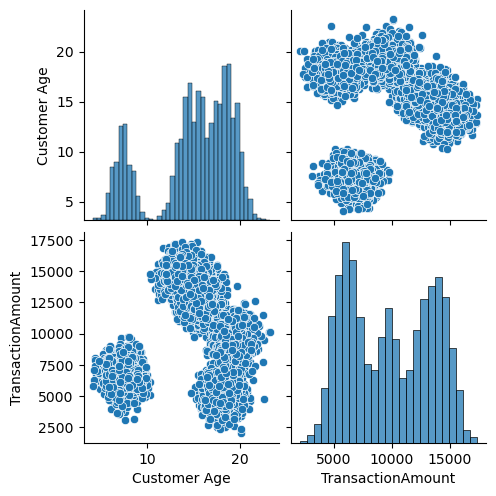

In [20]:
sns.pairplot(df,kind='scatter')

<Axes: xlabel='Customer Age', ylabel='TransactionAmount'>

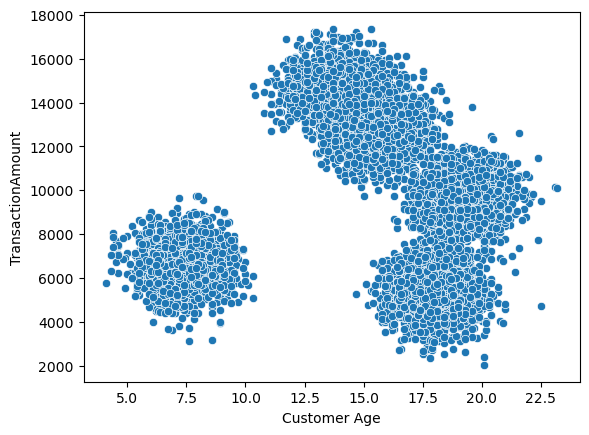

In [15]:
sns.scatterplot(x=df['Customer Age'],y=df['TransactionAmount'])

<Axes: xlabel='Customer Age', ylabel='TransactionAmount'>

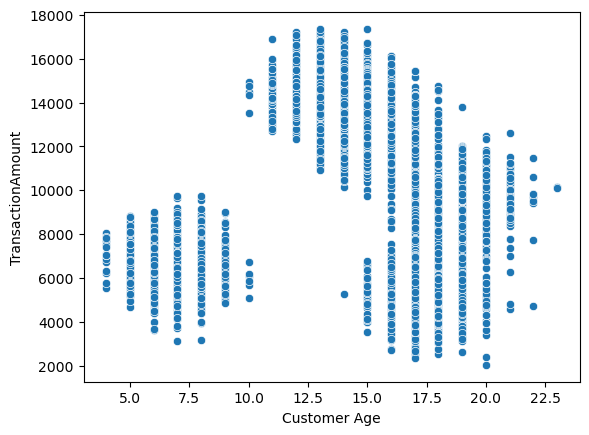

In [19]:
#a quick way of type conversion from float to int, df['Customer Age'].astype(int)
#visualising with connversion to int
sns.scatterplot(x=df['Customer Age'].astype(int),y=df['TransactionAmount'])

In [21]:
#checkinng for missing values
df.isnull().sum()

Customer Age         0
TransactionAmount    0
dtype: int64

### Data Processing

In [ ]:
#we have to scale. shrinking the data set to be in the same range
#bring data to a definned ranged like using 
#minMax scaling method
#standard scaling method

#We would be using standard scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:
#feature scaling
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)
scaled_df

array([[ 0.70958078, -1.34110981],
       [-2.10226911, -0.42866709],
       [-0.15024109,  1.19975656],
       ...,
       [-0.05728737,  0.94839025],
       [-0.40586381,  1.57699296],
       [-1.80016953, -1.00666786]])

In [25]:
scaled_df=pd.DataFrame(data=scaled_df, columns=['Customer Age','TransactionAmount'])

<Axes: xlabel='Customer Age', ylabel='TransactionAmount'>

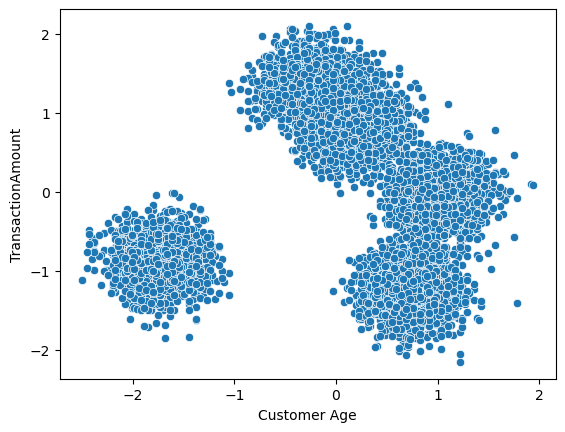

In [26]:
sns.scatterplot(x=scaled_df['Customer Age'],y=scaled_df['TransactionAmount'])

<Axes: xlabel='Customer Age', ylabel='TransactionAmount'>

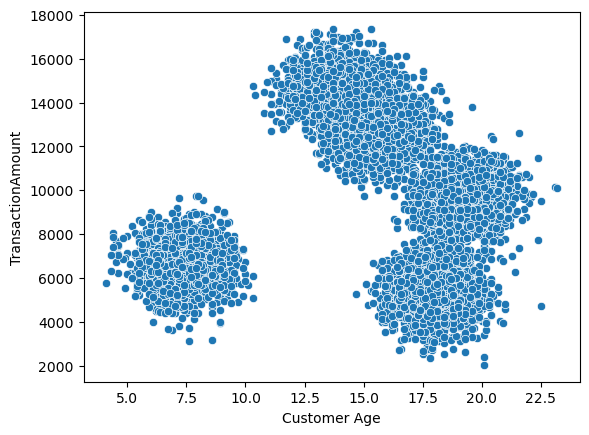

In [27]:
sns.scatterplot(x=df['Customer Age'],y=df['TransactionAmount'])

### Model Selection

In [33]:
#we will be using k-means Algorithm
from sklearn.cluster import KMeans

### Train and Evaluation

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
#remember this is a supervised ml task, so their is no target y
X=scaled_df
X_train, X_test= train_test_split(scaled_df, X, test_size=.2)

In [36]:
kmeans=KMeans(n_clusters=8, random_state=42)

In [37]:
#Training the model
kmeans.fit(X_train)

/Users/ctsalabs/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=42)

In [38]:
kmeans.predict(X_test)

array([4, 4, 2, ..., 7, 0, 4], dtype=int32)